# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

**Goal**: Prepare, tidy, and clean the data so that it is ready for exploration and analysis.

**Input:** 1 or more dataframes acquired through the "acquire" step.

**Output:** 1 dataset split into 3 samples in the form of dataframes: train, validate & test.

**Artifact:** `prepare.py`

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")  #turns off pink box warnings when working w/ data frames

# import our own acquire module
import acquire

In [101]:
# Use the function defined in acquire.py to load the iris data.

iris_df = acquire.get_iris_data()

In [102]:
# Drop the species_id and measurement_id columns.
iris_df = iris_df.drop(columns=['species_id'])

In [103]:
# Rename the species_name column to just species.
iris_df = iris_df.rename(columns={"species_name": "species"})

In [104]:
# Create dummy variables of the species name and concatenate onto the iris dataframe.

dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=False)

In [105]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)

In [122]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

def prep_iris():
    # Use the function defined in acquire.py to load the iris data.
    iris_df = acquire.get_iris_data()
    
    # Drop the species_id and measurement_id columns.
    iris_df = iris_df.drop(columns=['species_id'])
    
    # Rename the species_name column to just species.
    iris_df = iris_df.rename(columns={"species_name": "species"})
    
    # Create dummy variables of the species name and concatenate onto the iris dataframe.
    dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=False)
    
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    
    return iris_df

In [125]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [129]:
iris_train, iris_validate, iris_test = train_validate_test_split(iris_df, 'species')

In [130]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_setosa      84 non-null     uint8  
 6   species_versicolor  84 non-null     uint8  
 7   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [131]:
iris_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


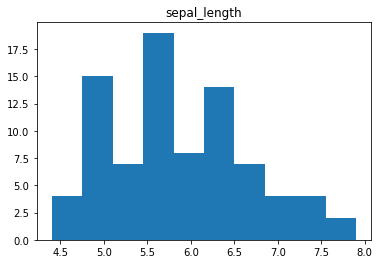

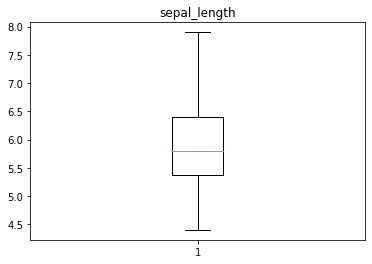

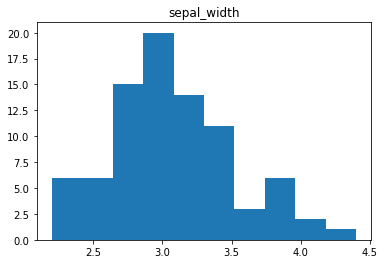

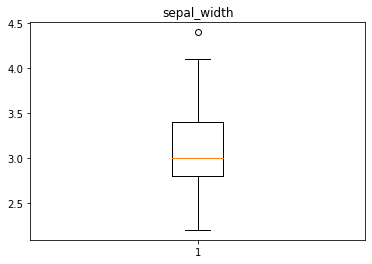

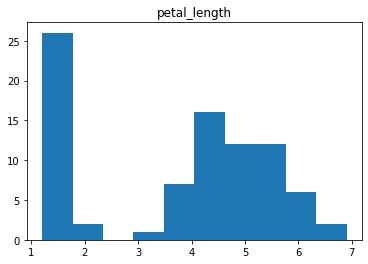

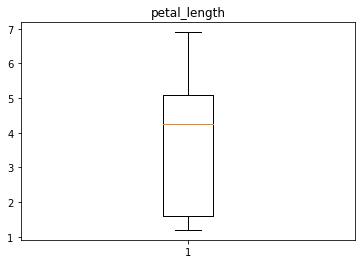

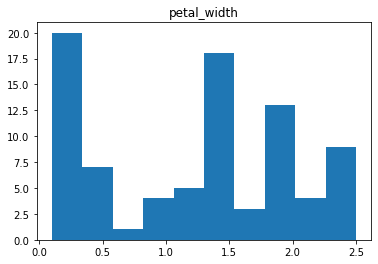

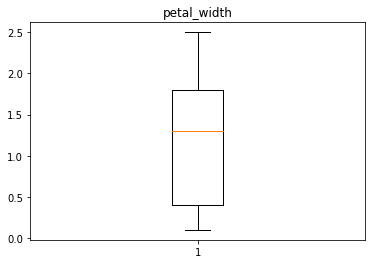

In [135]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute 
# descriptive statistics (using .describe()).

num_cols = iris_train.columns[[iris_train[col].dtype == 'float64' for col in iris_train.columns]]
for col in num_cols:
    plt.hist(iris_train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_train[col])
    plt.title(col)
    plt.show()

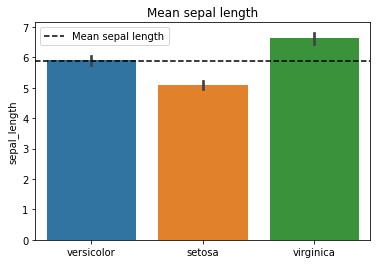

In [142]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).

plt.title("Mean sepal length")
sns.barplot(x="species", y="sepal_length", data=iris_train)
mean_sepal_length = iris_train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='black', linestyle='dashed')
plt.xlabel('')
plt.legend()
plt.show()

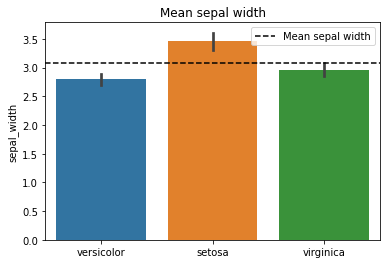

In [141]:
plt.title("Mean sepal width")
sns.barplot(x="species", y="sepal_width", data=iris_train)
mean_sepal_width = iris_train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='black', linestyle='dashed')
plt.xlabel('')
plt.legend()
plt.show()

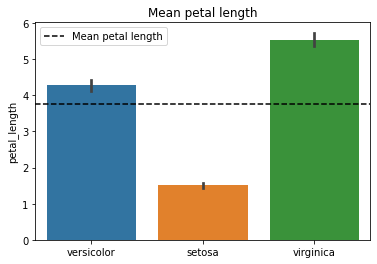

In [143]:
plt.title("Mean petal length")
sns.barplot(x="species", y="petal_length", data=iris_train)
mean_petal_length = iris_train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='black', linestyle='dashed')
plt.xlabel('')
plt.legend()
plt.show()

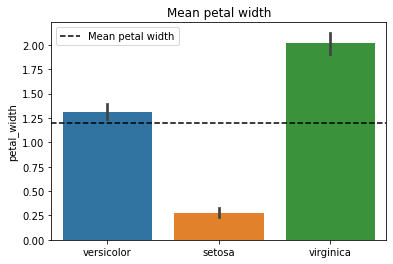

In [146]:
plt.title("Mean petal width")
sns.barplot(x="species", y="petal_width", data=iris_train)
mean_petal_width = iris_train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='black', linestyle='dashed')
plt.xlabel('')
plt.legend()
plt.show()

In [149]:
# For each measurement type, compute the descriptive statistics for each species.
print(iris_train[iris_train.species == 'virginica'].sepal_length.describe())
print(iris_train[iris_train.species == 'virginica'].sepal_width.describe())
print(iris_train[iris_train.species == 'virginica'].petal_length.describe())
print(iris_train[iris_train.species == 'virginica'].petal_width.describe())

count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64
count    28.000000
mean      2.960714
std       0.318956
min       2.200000
25%       2.800000
50%       3.000000
75%       3.100000
max       3.800000
Name: sepal_width, dtype: float64
count    28.000000
mean      5.535714
std       0.496815
min       4.800000
25%       5.100000
50%       5.500000
75%       5.800000
max       6.900000
Name: petal_length, dtype: float64
count    28.000000
mean      2.021429
std       0.293582
min       1.500000
25%       1.800000
50%       2.000000
75%       2.300000
max       2.500000
Name: petal_width, dtype: float64


In [150]:
print(iris_train[iris_train.species == 'setosa'].sepal_length.describe())
print(iris_train[iris_train.species == 'setosa'].sepal_width.describe())
print(iris_train[iris_train.species == 'setosa'].petal_length.describe())
print(iris_train[iris_train.species == 'setosa'].petal_width.describe())

count    28.000000
mean      5.089286
std       0.360390
min       4.400000
25%       4.875000
50%       5.000000
75%       5.400000
max       5.800000
Name: sepal_length, dtype: float64
count    28.000000
mean      3.467857
std       0.427788
min       2.300000
25%       3.275000
50%       3.400000
75%       3.800000
max       4.400000
Name: sepal_width, dtype: float64
count    28.000000
mean      1.507143
std       0.184448
min       1.200000
25%       1.400000
50%       1.500000
75%       1.600000
max       1.900000
Name: petal_length, dtype: float64
count    28.00000
mean      0.27500
std       0.12057
min       0.10000
25%       0.20000
50%       0.20000
75%       0.40000
max       0.60000
Name: petal_width, dtype: float64


In [157]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test 
# (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
# Do the same for the other measurement types.

test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
676.5 1.541014598267054e-06
------------------


Comparing sepal_width between virginica and versicolor
510.0 0.026286295699228482
------------------


Comparing petal_length between virginica and versicolor
776.5 1.4739917857575313e-10
------------------


Comparing petal_width between virginica and versicolor
767.0 3.235595834904965e-10
------------------




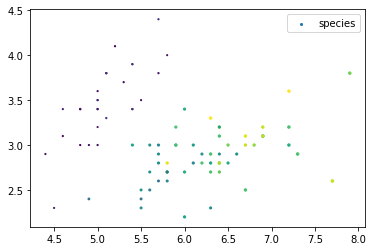

In [161]:
# Visualize the interaction of each measurement type with the others using a 
# pairplot (or scatter matrix or something similar) and add color to represent species.

plt.scatter(iris_train.sepal_length, iris_train.sepal_width, iris_train.petal_length, iris_train.petal_width, label="species")
plt.legend()

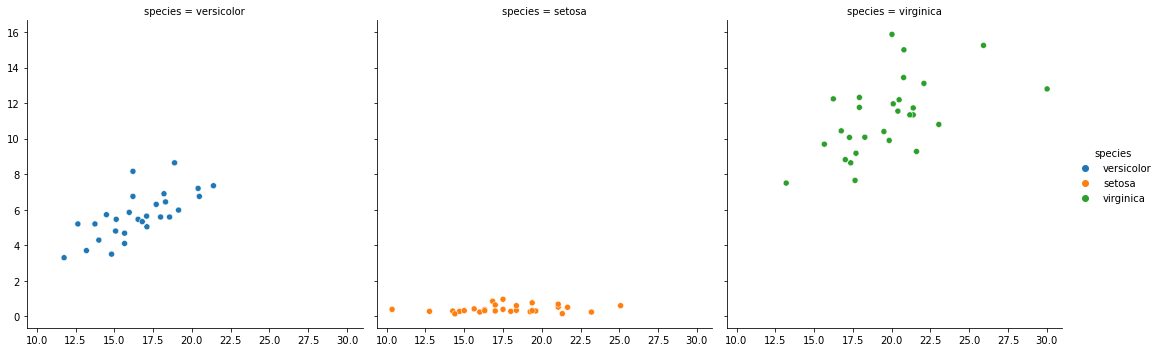

In [164]:
# Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

sns.relplot(data=iris_train, x=(iris_train.sepal_length * iris_train.sepal_width),
                                y=(iris_train.petal_length * iris_train.petal_width), 
                                kind='scatter', hue='species', col='species')

In [192]:
# Use the function defined in acquire.py to load the Titanic data.

titanic_df = acquire.get_titanic_data()

In [193]:
# Drop any unnecessary, unhelpful, or duplicated columns.
titanic_df = titanic_df.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'deck'])

In [194]:
# Encode the categorical columns. 
# Create dummy variables of the categorical columns and concatenate them onto the dataframe.

dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=False)
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)

In [195]:
def prep_titanic():
    # Use the function defined in acquire.py to load the Titanic data.
    titanic_df = acquire.get_titanic_data()
    
    # Drop any unnecessary, unhelpful, or duplicated columns.
    titanic_df = titanic_df.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'deck'])
    
    # Encode the categorical columns. 
    # Create dummy variables of the categorical columns and concatenate them onto the dataframe.
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=False)
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    
    return titanic_df

In [196]:
titanic_train, titanic_validate, titanic_test = train_validate_test_split(titanic_df, 'survived')

In [197]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sex                      498 non-null    object 
 3   age                      401 non-null    float64
 4   fare                     498 non-null    float64
 5   class                    498 non-null    object 
 6   embark_town              497 non-null    object 
 7   alone                    498 non-null    int64  
 8   sex_female               498 non-null    uint8  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Cherbourg    498 non-null    uint8  
 11  embark_town_Queenstown   498 non-null    uint8  
 12  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(3), object(3), uint8(5)
memory usage: 37.4+ KB


In [198]:
titanic_train.describe()

,survived,pclass,age,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,498.000000,498.000000,401.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.383534,2.305221,29.678105,31.130028,0.632530,0.351406,0.648594,0.204819,0.082329,0.710843
std,0.486735,0.826627,14.570127,47.162206,0.482601,0.477889,0.477889,0.403975,0.275142,0.453827
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,13.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,30.392700,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


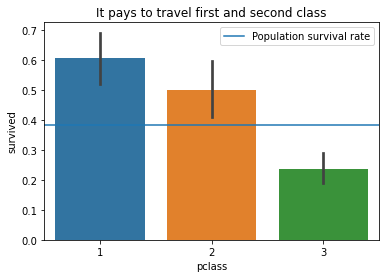

In [199]:
# Determine drivers of the target variable
# Determine if certain columns should be dropped
# Determine if it would be valuable to bin some numeric columns
# Determine if it would be valuable to combine multiple columns into one.

plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [200]:
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and class of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between class of ticket and survival


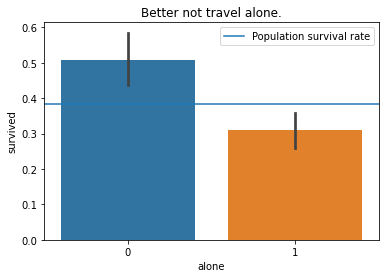

In [201]:
plt.title("Better not travel alone.")
sns.barplot(x="alone", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [202]:
alpha = 0.05
null_hypothesis = "survival and traveling alone are independent"
alternative_hypothesis = "there is a relationship between survival and traveling alone"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and traveling alone are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and traveling alone


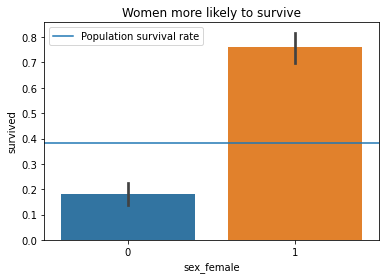

In [203]:
plt.title("Women more likely to survive")
sns.barplot(x="sex_female", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [204]:
alpha = 0.05

null_hypothesis = "survival and gender are independent"
alternative_hypothesis = "there is a relationship between survival and gender"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.sex_female)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and gender are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and gender


In [ ]:
# Subset the data into survived and not-surviving status
not_survived = train[train.survived == 0]
survived = train[train.survived == 1]

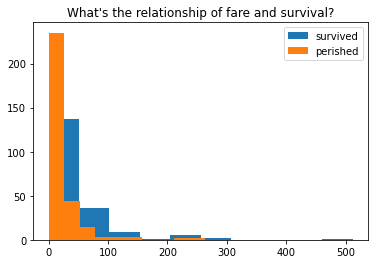

In [169]:
plt.title("What's the relationship of fare and survival?")
plt.hist(survived.fare, label="survived")
plt.hist(not_survived.fare, label="perished")
plt.legend()
plt.show()

In [170]:
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(survived.fare, not_survived.fare, alternative="greater")

In [205]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that survival and gender are independent
We find evidence evidence to move forward with the understaind that there is a relationship between survival and gender


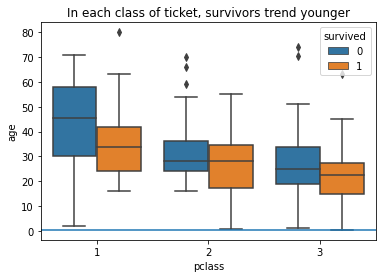

In [207]:
# At each class ticket, women have better survival rates
plt.title("In each class of ticket, survivors trend younger")
sns.boxplot(x="pclass", y="age", data=titanic_train, hue="survived")
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate)
plt.show()

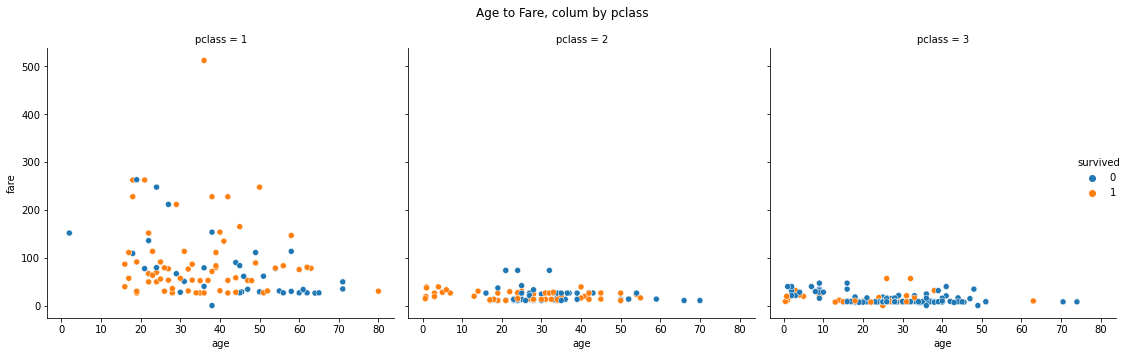

In [209]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x='age', y='fare', data=titanic_train, col="pclass", hue="survived")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

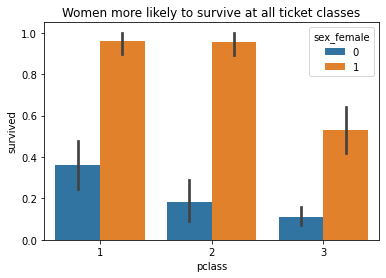

In [212]:
plt.title("Women more likely to survive at all ticket classes")
sns.barplot(x="pclass", y="survived", hue="sex_female", data=titanic_train)
population_survival_rate = train.survived.mean()
plt.show()

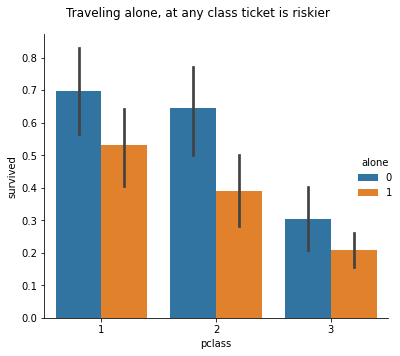

In [213]:
cat = sns.catplot(data=train, x="pclass", y="survived", hue="alone", kind="bar")
cat.fig.suptitle("Traveling alone, at any class ticket is riskier")
plt.tight_layout()

# Examples from Class
# STEP 1: Summarizing

In [5]:
# rows & columns
df.shape

(891, 13)

In [6]:
# view first n rows
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [7]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
# Get summary statistics for numeric columns.
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

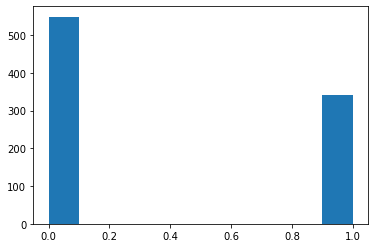

In [9]:
# Check out distributions of numeric columns.
plt.hist(df['survived'])

In [12]:
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
num_cols

Index(['passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'alone'], dtype='object')

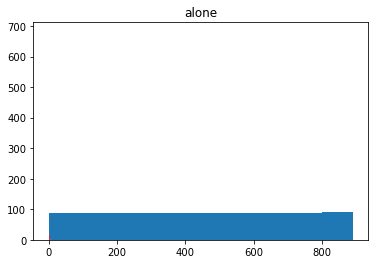

In [16]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show


In [14]:
# Use .describe with object columns.
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [15]:
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('------------------------------------------')

male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
------------------------------------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
------------------------------------------
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
------------------------------------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
------------------------------------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN        

In [17]:
# Create bins for fare using .value_counts.
# Using sort = false will sort by bin values as opposed to the frequency counts.
df.fare.value_counts(bins=5, sort=False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [20]:
# Find columns with missing values and the total of missing values.
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

# STEP 2: Cleaning the Data

#### Duplicate Data?

In [21]:
# Drop duplicates...run just in case; reassign and check the shape of my data
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(891, 13)
(891, 13)


#### Missing Data?

In [23]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)
df.shape

(891, 9)

In [24]:
# Validate that the columns are dropped.
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function, as below. Or we could use an imputer. We will demonstrate the imputer after the train-validate-test split.

In [25]:
# Run .fillna() on the entire df.
df['embark_town'] = df.embark_town.fillna(value='Southampton')

In [26]:
# Validate that missing values in embark_town have been handled.
df.embark_town.isna().sum()

0

#### Outliers?

There are a few outliers potentially in sibsp, parch, but w/o specific domain knowledge I won't drop or snap them, I'll ignore them for now.

#### Erroneous Values?

No erroneous values detected.

#### Correct Datatypes?

In [27]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
sibsp             int64
parch             int64
fare            float64
embark_town      object
alone             int64
dtype: object

#### Text Normalization?

No text normalization issues detected.

#### Tidy Data?

In [ ]:
# Each column should only represent one variable
# Each row should be one observation (passenger)

#### Create New Variables?

Get dummy vars for sex and embark_town

dummy_na: create a dummy var for na values, also?
drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [29]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, False])

In [30]:
# Concatenate the dummy_df dataframe above with the original df and validate.
df = pd.concat([df, dummy_df], axis=1)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


#### Rename Columns?

#### Scaling Data?

In [ ]:
# You want to scale data when you're using methods based on measures
# of how far apart data points, like support vector machines
# or k-nearest neighbors.


### Lets not do that all over again repeatedly...lets make a function

In [31]:
def clean_data(df):
    '''
    This function will clean the data
    '''
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, False])
    df = pd.concat([df, dummy_df], axis=1)
    return df

Testing that the function does what we intend for it to do:

In [33]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [34]:
df = clean_data(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


# Step 3: Splitting

In [35]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
# function wants name of df and proportion of the split, 'stratify' makes sure that variable is equally well
# represented in both sets
train, test = train_test_split(df, test_size = .2, random_state = 123, stratify=df.survived)

In [36]:
# Observe split
print(train.shape)
print(test.shape)

(712, 12)
(179, 12)


In [37]:
train, validate = train_test_split(train, test_size = .3, random_state = 123, stratify=train.survived)

In [40]:
# Observe split
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')
print(f'Validate: {validate.shape}')

Train: (498, 12)
Test: (179, 12)
Validate: (214, 12)


### Turn it into a function

In [42]:
def split_data(df):
    '''
    Takes in a dataframe and returns train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state = 123, stratify=df.survived)
    train, validate = train_test_split(train, test_size = .3, random_state = 123, stratify=train.survived)
    return train, validate, test

Testing that the function is doing what we intend for it to do:

In [43]:
train, validate, test = split_data(df)
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')
print(f'Validate: {validate.shape}')

Train: (498, 12)
Test: (179, 12)
Validate: (214, 12)


# Alternative Method: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
1. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
1. Transform train: fill missing values in train dataset with the stored value
1. Transform validate: fill missing values in validate dataset with the stored value
1. Transform test: fill missing values in test dataset with the stored value

In [51]:
# Get fresh Titanic data to use with missing values in embark_town again.
df = acquire.get_titanic_data()
train, validate, test = split_data(df)

In [52]:
# ONLY look at train dataset after we split our data.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   age           401 non-null    float64
 5   sibsp         498 non-null    int64  
 6   parch         498 non-null    int64  
 7   fare          498 non-null    float64
 8   embarked      497 non-null    object 
 9   class         498 non-null    object 
 10  deck          106 non-null    object 
 11  embark_town   497 non-null    object 
 12  alone         498 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 54.5+ KB


Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [53]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

`Fit` the imputer to the columns in the training df. This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column.

In [54]:
imputer = imputer.fit(train[['embark_town']])

It will store that value in the imputer object to use upon calling `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [55]:
train[['embark_town']] = imputer.transform(train[['embark_town']])
validate[['embark_town']] = imputer.transform(validate[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])

In [56]:
# Validate that there are no longer any Null values in embark_town.
print(train.embark_town.value_counts(dropna=False))
print(validate.embark_town.value_counts(dropna=False))
print(test.embark_town.value_counts(dropna=False))

Southampton    355
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64
Southampton    160
Cherbourg       38
Queenstown      16
Name: embark_town, dtype: int64
Southampton    131
Cherbourg       28
Queenstown      20
Name: embark_town, dtype: int64


### Simplify our life with a function

Note: the `clean_data()` function is already dealing with missing values. If we want to use imputation, we will need to go back and tweak our earlier function.

In [ ]:
# Yay functions!
def impute_mode(train, validate, test):
    '''
    Takes in train, validate and test and uses train to id the best value to replace nulls
    Imputes that value into all 3 sets and returns them
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    imputer = imputer.fit(train[['embark_town']])
    train[['embark_town']] = imputer.transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

### We can create a function made of our other functions

In [59]:
# Another function? YES PLZ!
def prep_titanic_data(df):
    '''
    Ultimate dishwasher
    '''
    df = clean_data(df)
    train, validate, test = split_data(df)
    return train, validate, test

In [60]:
# Acquire fresh Titanic data to test my funtion.
df = acquire.get_titanic_data()

In [61]:
# Run final prepare function and validate what that the function is working properly.
train, validate, test = prep_titanic_data(df)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   embark_town              498 non-null    object 
 8   alone                    498 non-null    int64  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Queenstown   498 non-null    uint8  
 11  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 40.4+ KB


# Exercise Time